In [1]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.utils import shuffle
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('http_requests.csv', sep=',', error_bad_lines=False, index_col=False, dtype='unicode')
df = shuffle(df)
df['payload'] = df['payload'].fillna(0)
df['payload'] = df['payload'].apply(lambda x: str(x))
df.drop(columns=['index', 'method', 'url', 'protocol', 'userAgent', 'pragma', 'cacheControl', 'accept', 'acceptEncoding', 'acceptCharset', 'acceptLanguage', 'host', 'connection', 'contentLength', 'contentType', 'cookie'], inplace=True)

In [3]:
# Function to generate a 255 dim feature vector from 'payload'
# Return a list of length 255 with features of payloads mapped to it
# Each list index represents an ASCII character and value represents count
# q = [4, 5, 2, 6, 12,  ....]


def vectorize_payload(payload):
    vec_255 = [0]*255
    vectorizer = CountVectorizer(analyzer='char', ngram_range=(1, 1))
    vectorized = vectorizer.fit_transform([payload])
    mapped = list(zip(vectorizer.get_feature_names(), vectorized.sum(0).getA1()))
    for x in mapped:
        vec_255[ord(x[0])] = x[1]
    return vec_255


In [6]:
# conversion to 256 dimensional vector
vectors = np.array(df['payload'].apply(lambda x: vectorize_payload(x)))
vectors


0.10455768859987938
0.01098367819302445
0.006383148583841991
0.005339160200536845
0.0047624185427026676
0.0029846853654069802
0.002743298446938757
0.0026534564490624203
0.0022841380316715853
0.002115370617497743
0.0016624616382583028
0.0014812181354289485
0.0013743141260122303
0.0010702712346511523
0.0010256431472531154
0.0009536531369257867
0.0008929515519591419
0.0008529953249946643
0.0008093897291523206
0.0007715308350351004
0.0006927332983509898
0.0006741828505504683
0.0006085870864172058
0.000529991494068448
0.0005027194477562227
0.0004508463752157913
0.00037956849866168204
0.0003499295537917691
0.00024904477196630595
0.00022221487897273895
0.0002175040000459425
0.00015688526368854135
0.00013026931284706116
0.00012567617668127155
0.00012057970031200058
9.678731453538436e-05
5.139558656946477e-05
4.414525479325747e-05
4.3589251092671956e-05
3.3538974319851636e-05
1.1601350368352984e-05
9.873442116561496e-06
1.0098484929645552e-06
4.0703821930601057e-10
9.41409781122703e-18
1.610307

In [8]:
# Function to generate frequency for 255 dim feature vectors
# Return a list of length 255 with feature frequencies
# Each list index represents an ASCII character and value represents its frequency
# q = [0.23, 0, 0, 0.03, 0.42,  ....] = 1


def calc_frequency(payloads_vectors):
    features_total = 0
    for feature in payloads_vectors:
        features_total += feature
    features_total *= 1.0
    payloads_vectors = [(x/features_total) for x in payloads_vectors]
    return np.array(payloads_vectors, dtype=np.float16)


results = [calc_frequency(x) for x in vectors]
features_frequency = np.vstack(results)
del results


0.10455768859987938
0.01098367819302445
0.006383148583841991
0.005339160200536845
0.0047624185427026676
0.0029846853654069802
0.002743298446938757
0.0026534564490624203
0.0022841380316715853
0.002115370617497743
0.0016624616382583028
0.0014812181354289485
0.0013743141260122303
0.0010702712346511523
0.0010256431472531154
0.0009536531369257867
0.0008929515519591419
0.0008529953249946643
0.0008093897291523206
0.0007715308350351004
0.0006927332983509898
0.0006741828505504683
0.0006085870864172058
0.000529991494068448
0.0005027194477562227
0.0004508463752157913
0.00037956849866168204
0.0003499295537917691
0.00024904477196630595
0.00022221487897273895
0.0002175040000459425
0.00015688526368854135
0.00013026931284706116
0.00012567617668127155
0.00012057970031200058
9.678731453538436e-05
5.139558656946477e-05
4.414525479325747e-05
4.3589251092671956e-05
3.3538974319851636e-05
1.1601350368352984e-05
9.873442116561496e-06
1.0098484929645552e-06
4.0703821930601057e-10
9.41409781122703e-18
1.610307

In [9]:
# Function to generate mean vector for n payloads
# Assuming data set has traffic of n packets
# Return a list of length 255 with mean for every 255 features from payload vectors
# x' = [2.3, 3.1, 2.23, 7.5, 12.2,  ....]


def calc_mean(frequency_vectors):
    return np.mean(frequency_vectors, axis=0)


features_mean = calc_mean(features_frequency)


0.10455768859987938
0.01098367819302445
0.006383148583841991
0.005339160200536845
0.0047624185427026676
0.0029846853654069802
0.002743298446938757
0.0026534564490624203
0.0022841380316715853
0.002115370617497743
0.0016624616382583028
0.0014812181354289485
0.0013743141260122303
0.0010702712346511523
0.0010256431472531154
0.0009536531369257867
0.0008929515519591419
0.0008529953249946643
0.0008093897291523206
0.0007715308350351004
0.0006927332983509898
0.0006741828505504683
0.0006085870864172058
0.000529991494068448
0.0005027194477562227
0.0004508463752157913
0.00037956849866168204
0.0003499295537917691
0.00024904477196630595
0.00022221487897273895
0.0002175040000459425
0.00015688526368854135
0.00013026931284706116
0.00012567617668127155
0.00012057970031200058
9.678731453538436e-05
5.139558656946477e-05
4.414525479325747e-05
4.3589251092671956e-05
3.3538974319851636e-05
1.1601350368352984e-05
9.873442116561496e-06
1.0098484929645552e-06
4.0703821930601057e-10
9.41409781122703e-18
1.610307

In [11]:
# Function to generate sample covariance matrix n-1
# Assuming data set has traffic of n packets
# Return a covariance matrix for given frequency vectors


def calc_cov_mat():
    mean_shift = np.transpose(np.subtract(features_frequency, features_mean))    
    return np.cov(mean_shift), mean_shift


cov_mat, mean_shift = calc_cov_mat()


0.10455768859987938
0.01098367819302445
0.006383148583841991
0.005339160200536845
0.0047624185427026676
0.0029846853654069802
0.002743298446938757
0.0026534564490624203
0.0022841380316715853
0.002115370617497743
0.0016624616382583028
0.0014812181354289485
0.0013743141260122303
0.0010702712346511523
0.0010256431472531154
0.0009536531369257867
0.0008929515519591419
0.0008529953249946643
0.0008093897291523206
0.0007715308350351004
0.0006927332983509898
0.0006741828505504683
0.0006085870864172058
0.000529991494068448
0.0005027194477562227
0.0004508463752157913
0.00037956849866168204
0.0003499295537917691
0.00024904477196630595
0.00022221487897273895
0.0002175040000459425
0.00015688526368854135
0.00013026931284706116
0.00012567617668127155
0.00012057970031200058
9.678731453538436e-05
5.139558656946477e-05
4.414525479325747e-05
4.3589251092671956e-05
3.3538974319851636e-05
1.1601350368352984e-05
9.873442116561496e-06
1.0098484929645552e-06
4.0703821930601057e-10
9.41409781122703e-18
1.610307

In [19]:
eig_val, eig_vec = np.linalg.eigh(cov_mat)
eig_pairs = [(np.abs(eig_val[x]), eig_vec[:,x]) for x in range(len(eig_val))]


0.10455768859987938
0.01098367819302445
0.006383148583841991
0.005339160200536845
0.0047624185427026676
0.0029846853654069802
0.002743298446938757
0.0026534564490624203
0.0022841380316715853
0.002115370617497743
0.0016624616382583028
0.0014812181354289485
0.0013743141260122303
0.0010702712346511523
0.0010256431472531154
0.0009536531369257867
0.0008929515519591419
0.0008529953249946643
0.0008093897291523206
0.0007715308350351004
0.0006927332983509898
0.0006741828505504683
0.0006085870864172058
0.000529991494068448
0.0005027194477562227
0.0004508463752157913
0.00037956849866168204
0.0003499295537917691
0.00024904477196630595
0.00022221487897273895
0.0002175040000459425
0.00015688526368854135
0.00013026931284706116
0.00012567617668127155
0.00012057970031200058
9.678731453538436e-05
5.139558656946477e-05
4.414525479325747e-05
4.3589251092671956e-05
3.3538974319851636e-05
1.1601350368352984e-05
9.873442116561496e-06
1.0098484929645552e-06
4.0703821930601057e-10
9.41409781122703e-18
1.610307

In [20]:
# Sort eig_pairs if need be
eig_pairs.sort(key=lambda x: x[0], reverse=True)
for i in eig_pairs:
    print(i[0])


0.10455768859987938
0.01098367819302445
0.006383148583841991
0.005339160200536845
0.0047624185427026676
0.0029846853654069802
0.002743298446938757
0.0026534564490624203
0.0022841380316715853
0.002115370617497743
0.0016624616382583028
0.0014812181354289485
0.0013743141260122303
0.0010702712346511523
0.0010256431472531154
0.0009536531369257867
0.0008929515519591419
0.0008529953249946643
0.0008093897291523206
0.0007715308350351004
0.0006927332983509898
0.0006741828505504683
0.0006085870864172058
0.000529991494068448
0.0005027194477562227
0.0004508463752157913
0.00037956849866168204
0.0003499295537917691
0.00024904477196630595
0.00022221487897273895
0.0002175040000459425
0.00015688526368854135
0.00013026931284706116
0.00012567617668127155
0.00012057970031200058
9.678731453538436e-05
5.139558656946477e-05
4.414525479325747e-05
4.3589251092671956e-05
3.3538974319851636e-05
1.1601350368352984e-05
9.873442116561496e-06
1.0098484929645552e-06
4.0703821930601057e-10
9.41409781122703e-18
1.610307

In [17]:
def scatter_plot_data():
    idx = np.argsort(eig_val)[::-1]
    evecs = eig_vec[:,idx]
    evecs = evecs[:, :2]
    
    data_resc = np.dot(evecs.T, mean_shift).T
    
    # scatter plot for data correlation
    clr1 = '#2026B2'
    fig2 = plt.figure(figsize=(20, 20))
    ax1 = fig2.add_subplot(111)
    ax1.plot(data_resc[:, 0], data_resc[:, 1], '.', mfc=clr1, mec=clr1)
    plt.show()


scatter_plot_data()


0.10455768859987938
0.01098367819302445
0.006383148583841991
0.005339160200536845
0.0047624185427026676
0.0029846853654069802
0.002743298446938757
0.0026534564490624203
0.0022841380316715853
0.002115370617497743
0.0016624616382583028
0.0014812181354289485
0.0013743141260122303
0.0010702712346511523
0.0010256431472531154
0.0009536531369257867
0.0008929515519591419
0.0008529953249946643
0.0008093897291523206
0.0007715308350351004
0.0006927332983509898
0.0006741828505504683
0.0006085870864172058
0.000529991494068448
0.0005027194477562227
0.0004508463752157913
0.00037956849866168204
0.0003499295537917691
0.00024904477196630595
0.00022221487897273895
0.0002175040000459425
0.00015688526368854135
0.00013026931284706116
0.00012567617668127155
0.00012057970031200058
9.678731453538436e-05
5.139558656946477e-05
4.414525479325747e-05
4.3589251092671956e-05
3.3538974319851636e-05
1.1601350368352984e-05
9.873442116561496e-06
1.0098484929645552e-06
4.0703821930601057e-10
9.41409781122703e-18
1.610307

In [18]:
# Function to sum eigen vals which is equal to the cumulative energy
# Takes into account for a range of eigen values to count for
# Returns a single number representing the sum


def sum_cumulative_energy(pairs):
    THRESHOLD = 100e-6
    sum = 0
    for x in pairs:
        sum += x[0] if x[0] > THRESHOLD else 0
    return sum


cumulative_sum = sum_cumulative_energy(eig_pairs)
cumulative_sum


Current Sum: 0.104558, Curr cumsum: 64.897435, Diff: 0.104558
Current Sum: 0.115541, Curr cumsum: 71.714844, Diff: 0.010984
Current Sum: 0.121925, Curr cumsum: 75.676772, Diff: 0.006383
Current Sum: 0.127264, Curr cumsum: 78.990711, Diff: 0.005339
Current Sum: 0.132026, Curr cumsum: 81.946675, Diff: 0.004762
Current Sum: 0.135011, Curr cumsum: 83.799225, Diff: 0.002985
Current Sum: 0.137754, Curr cumsum: 85.501951, Diff: 0.002743
Current Sum: 0.140408, Curr cumsum: 87.148913, Diff: 0.002653
Current Sum: 0.142692, Curr cumsum: 88.566644, Diff: 0.002284
Current Sum: 0.144807, Curr cumsum: 89.879624, Diff: 0.002115
Current Sum: 0.146470, Curr cumsum: 90.911489, Diff: 0.001662
Current Sum: 0.147951, Curr cumsum: 91.830860, Diff: 0.001481
Current Sum: 0.149325, Curr cumsum: 92.683877, Diff: 0.001374
Current Sum: 0.150395, Curr cumsum: 93.348178, Diff: 0.001070
Current Sum: 0.151421, Curr cumsum: 93.984780, Diff: 0.001026
Current Sum: 0.152375, Curr cumsum: 94.576699, Diff: 0.000954
Current 

(33, 99.84715256202634)

In [21]:
# This method goes through ordered eig_pairs and calculates cumsum
# If diff of cumsum with previous is less than threshold 155e-6
# It stops when cumsum is minimum to ensure maximum cumulative energy
# and minimum PC's
# It then returns the num of eigen values that can be used as PC


def cumulative_constant(cumulative_sum, pairs):
    current_sum, prev_sum, diff, curr_cumsum = 0, 0, 1, 0
    i = 0
    while i != len(pairs)  and diff > 155e-6:
        prev_sum = current_sum
        current_sum += pairs[i][0]
        diff = current_sum - prev_sum
        curr_cumsum = (current_sum/cumulative_sum)*100
        print("Current Sum: %f, Curr cumsum: %f, Diff: %f" % (current_sum, curr_cumsum, diff))
        i += 1
    return i, curr_cumsum


num_of_PC, cumsum = cumulative_constant(cumulative_sum, eig_pairs)
num_of_PC, cumsum

Current Sum: 0.104558, Curr cumsum: 64.897435, Diff: 0.104558
Current Sum: 0.115541, Curr cumsum: 71.714844, Diff: 0.010984
Current Sum: 0.121925, Curr cumsum: 75.676772, Diff: 0.006383
Current Sum: 0.127264, Curr cumsum: 78.990711, Diff: 0.005339
Current Sum: 0.132026, Curr cumsum: 81.946675, Diff: 0.004762
Current Sum: 0.135011, Curr cumsum: 83.799225, Diff: 0.002985
Current Sum: 0.137754, Curr cumsum: 85.501951, Diff: 0.002743
Current Sum: 0.140408, Curr cumsum: 87.148913, Diff: 0.002653
Current Sum: 0.142692, Curr cumsum: 88.566644, Diff: 0.002284
Current Sum: 0.144807, Curr cumsum: 89.879624, Diff: 0.002115
Current Sum: 0.146470, Curr cumsum: 90.911489, Diff: 0.001662
Current Sum: 0.147951, Curr cumsum: 91.830860, Diff: 0.001481
Current Sum: 0.149325, Curr cumsum: 92.683877, Diff: 0.001374
Current Sum: 0.150395, Curr cumsum: 93.348178, Diff: 0.001070
Current Sum: 0.151421, Curr cumsum: 93.984780, Diff: 0.001026
Current Sum: 0.152375, Curr cumsum: 94.576699, Diff: 0.000954
Current 

(33, 99.84715256202634)

In [22]:
# A simple line plot showing trends in PC's variances


def simple_scree_plot(pca):
    fig = plt.figure(figsize=(20, 20))
    ax = fig.add_subplot()
    ax.plot(np.cumsum(pca.explained_variance_ratio_))
    
    ax.set_xlabel('number of components')
    ax.set_ylabel('cumulative explained variance')
    
    ax.xaxis.label.set_color('white')
    ax.yaxis.label.set_color('white')
    
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    
    plt.show()


In [26]:
# A scree bar plot showing contribution of components in the data


def scree_plot(pca):
    
    num_of_components = len(pca.explained_variance_ratio_)
    index = np.arange(num_of_components)
    values = pca.explained_variance_ratio_
    
    plt.figure(figsize=(20, 10))
    ax = plt.subplot(111)
    cumulative = np.cumsum(values)
    
    ax.bar(index, cumulative)
    ax.plot(index, cumulative)
    
    for i in range(num_of_components):
        ax.annotate(r'%s' % (str(values[i]*100)[:3]), (index[i], values[i]), 
                    va='bottom', ha='center', fontsize=14)
    ax.set_xlabel('Principal component number')
    ax.set_ylabel('Variance Explained Percentage')
    
    ax.xaxis.label.set_color('white')
    ax.yaxis.label.set_color('white')
    
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    
    plt.title('Scree Plot for Payloads Frequency')


In [23]:
# Function to generate PCA using the features matrix
# It uses sklearn library PCA definition
# Returns the PCA object


def cal_pca(features_data):
    pca = PCA(30)
    pca.fit_transform(features_data)
    return pca


pca = cal_pca(features_frequency)


In [24]:
simple_scree_plot(pca)


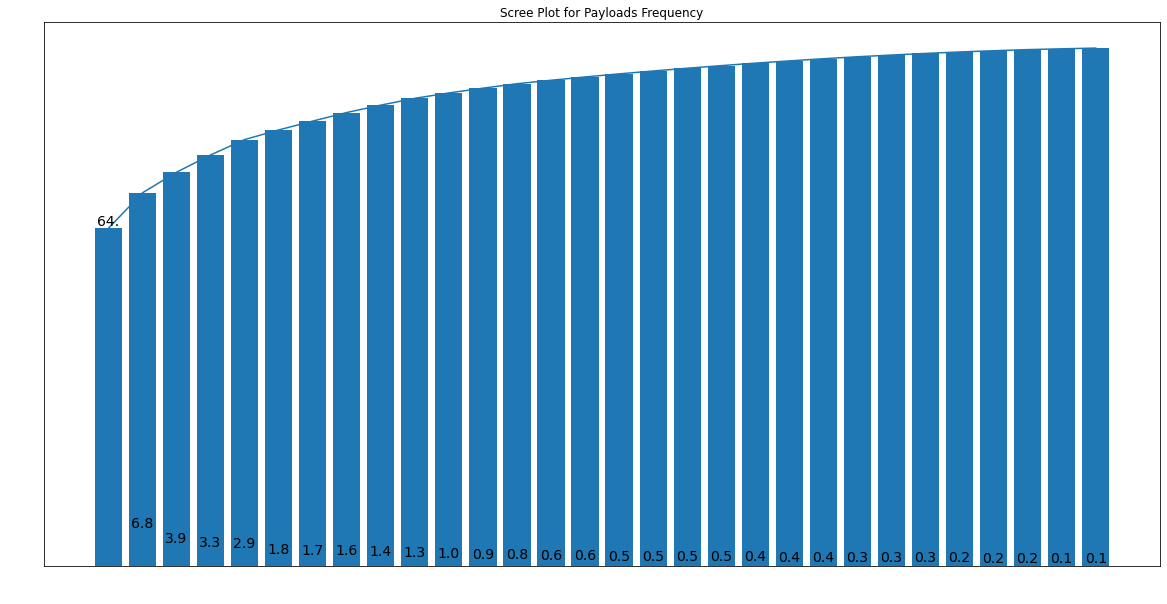

In [27]:
scree_plot(pca)